In [2]:
url_api="https://ressources.data.sncf.com/api/v2/catalog/datasets/regularite-mensuelle-ter/exports/json?limit=-1&offset=0&timezone=UTC"

In [3]:
import requests
import pandas as pd
#recupération des données de régularité via l'API SNCF 
req = requests.get(url_api)
wb = req.json()

# normalisation du fichier json
df = pd.json_normalize(wb)
print(df.shape)
df.sort_values(by='date').head(8) #inspection des 8 premières lignes


(1825, 9)


,date,region,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,commentaires
0,2013-01,Basse Normandie,3331.0,3297.0,34.0,311.0,90.567182,9.601286,Grand froid et épisode neigeux les semaines 3 ...
526,2013-01,Centre,9882.0,9687.0,195.0,812.0,91.617632,10.929803,"Trois incidents caténaires lourds, dont deux p..."
523,2013-01,Auvergne,5785.0,5732.0,53.0,431.0,92.480809,12.299304,Conditions météos défavorables.
520,2013-01,Aquitaine,8099.0,8014.0,85.0,731.0,90.878463,9.963064,Intempéries à partir du 20 janvier.
517,2013-01,Alsace,20095.0,19874.0,221.0,897.0,95.486565,21.156076,Intempéries.
35,2013-01,Languedoc Roussillon,5024.0,4897.0,127.0,377.0,92.301409,11.989390,Chute de neige sur le littoral.
37,2013-01,Midi Pyrénées,8208.0,7941.0,267.0,903.0,88.628636,7.794020,None
529,2013-01,Franche Comté,5826.0,5744.0,82.0,553.0,90.372563,9.386980,None


**Description de la base**

Ce jeu de données porte sur la régularité des trains de la SNCF depuis janvier 2015 jusqu'au 28 octobre 2022. Il contient 1825 observations qui sont enrégistrées mensuellement et par région. Il contient 9 variables à savoir:

- **date** : YYYY-MM Année et mois pour ces résultats
- **region** : nom de la région concernée
- **nombre_de_trains_programmes** : nombre de trains programmés pour le mois 
- **nombre_de_trains_ayant_circule** : nombre de trains programmés qui ont effectivement circulé 
- **nombre_de_trains_annules** : nombre de trains programmés qui ont été annulés
- **nombre_de_trains_en_retard_a_l_arrivee** : nombre de trains retardés parmi les trains prévus (retart définie dans l'introduction au projet)
- **taux_de_regularite** : pourcentage de trains à l'heure 
- **nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee** : nombre de trains qui sont effectivement arrivés à l'heure pour 1 train annulé (par exemple : 10 trains étaient à l'heure pour 1 retardé)
- **commentaires** : divers commentaires rédigés par les gestionnaires sur les raisons du retard ou de l'annulation des trains, et des observations sur les différents indicateurs et résultats.


**Analyse de la qualité de base en vue du traitement des données**


In [4]:
#Type des variables
df.dtypes # print pour observer 

date                                                               object
region                                                             object
nombre_de_trains_programmes                                       float64
nombre_de_trains_ayant_circule                                    float64
nombre_de_trains_annules                                          float64
nombre_de_trains_en_retard_a_l_arrivee                            float64
taux_de_regularite                                                float64
nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee    float64
commentaires                                                       object
dtype: object

In [5]:
#quelques statistiques sur les variables quantitatives
df.describe()

,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee
count,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000
mean,12292.477629,12039.897651,258.276846,1011.242729,91.574464,13.044802
std,9015.810259,8818.687906,291.916890,837.461109,3.420634,6.218286
min,1129.000000,1125.000000,4.000000,35.000000,74.365711,2.901025
25%,5901.500000,5825.750000,83.000000,421.000000,89.670614,8.681130
50%,9474.000000,9263.500000,157.000000,729.500000,92.017786,11.527859
75%,14888.000000,14406.500000,333.000000,1239.500000,94.124250,16.019116
max,46329.000000,45569.000000,4024.000000,4576.000000,98.026494,49.671233


In [6]:
#Donnnées manquantes
df.isnull().sum()

date                                                                0
region                                                              0
nombre_de_trains_programmes                                        37
nombre_de_trains_ayant_circule                                     37
nombre_de_trains_annules                                           37
nombre_de_trains_en_retard_a_l_arrivee                             37
taux_de_regularite                                                 37
nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee     37
commentaires                                                      899
dtype: int64

In [7]:
#Identification des régions présentes dans la base
list_regions=df['region'].unique()  #list des régions sous forme numpy.ndarray
print(len(list_regions))
print(list_regions)
#Nombre d'année couvert par la base
list_annee=df['date'].unique()  #list des années sous forme numpy.ndarray
print(len(list_annee))
print(list_annee)

28
['Basse Normandie' 'Champagne Ardenne' 'Lorraine' 'Aquitaine'
 'Nord Pas de Calais' 'Rhône Alpes' 'Alsace' 'Picardie' 'Franche Comté'
 'Midi Pyrénées' 'Bourgogne' 'Bretagne' 'Limousin' 'Pays-de-la-Loire'
 'Languedoc Roussillon' 'Auvergne' 'Haute Normandie'
 "Provence Alpes Côte d'Azur" 'Poitou Charentes' 'Centre' 'Grand Est'
 'Hauts-de-France' 'Normandie' 'Auvergne-Rhône-Alpes'
 'Bourgogne-Franche-Comté' 'Occitanie' 'Centre Val-de-Loire'
 'Nouvelle Aquitaine']
119
['2013-01' '2013-02' '2013-03' '2013-04' '2013-05' '2013-06' '2013-07'
 '2013-08' '2013-09' '2013-10' '2013-11' '2013-12' '2014-01' '2014-02'
 '2014-03' '2014-04' '2014-05' '2014-06' '2014-07' '2014-08' '2014-09'
 '2014-10' '2014-11' '2014-12' '2015-01' '2015-02' '2015-03' '2015-04'
 '2015-05' '2015-06' '2015-07' '2015-08' '2015-09' '2015-10' '2015-11'
 '2015-12' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05' '2016-06'
 '2016-07' '2016-08' '2016-09' '2016-10' '2016-11' '2016-12' '2017-01'
 '2017-02' '2017-03' '2017-04' 

In [8]:
for i in list_regions :
    print(i,",")

Basse Normandie ,
Champagne Ardenne ,
Lorraine ,
Aquitaine ,
Nord Pas de Calais ,
Rhône Alpes ,
Alsace ,
Picardie ,
Franche Comté ,
Midi Pyrénées ,
Bourgogne ,
Bretagne ,
Limousin ,
Pays-de-la-Loire ,
Languedoc Roussillon ,
Auvergne ,
Haute Normandie ,
Provence Alpes Côte d'Azur ,
Poitou Charentes ,
Centre ,
Grand Est ,
Hauts-de-France ,
Normandie ,
Auvergne-Rhône-Alpes ,
Bourgogne-Franche-Comté ,
Occitanie ,
Centre Val-de-Loire ,
Nouvelle Aquitaine ,


On remarque qu'il ya 28 régions présentes tandis que la france compte actuellement et officiellement 12 régions. Le problème se trouve au niveau de l'évolution du découpage administratif de 2013 à 2022. En effet, une reforme du découpage des régions a eu lieu en France lors de l'année 2014. Plusieurs régions ont été fusionnées si on peut le dire ainsi.


In [9]:
#Identification des région avec le plus de valeur NAN
df_na=df[df['nombre_de_trains_programmes'].isnull()==1]
print(df_na.shape)
print(df_na['region'].unique())
df_na.head(37)
print(df_na['commentaires'].unique())

(37, 9)
['Lorraine' 'Nord Pas de Calais']
["Le Président de la Région Lorraine s'est opposé, par courrier du 10 juillet 2013, à ce que SNCF transmette à l'AQST les données relatives aux trains TER lorrains en retard ou annulés, au motif qu'il n'a pas ''de visibilité sur les capacités des régions à poursuivre leurs missions d'autorité organisatrice des transports régionaux''."
 None]


In [10]:
df_na.sort_values(by='date').head(37)

,date,region,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,commentaires
2,2013-01,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
53,2013-02,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
1096,2013-03,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
1103,2013-04,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
1136,2013-05,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
21,2013-06,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
1156,2013-07,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
1166,2013-08,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
607,2013-09,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...
38,2013-10,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...


In [11]:
#suppression des lignes avec des valeurs manquantes


le nombre de manquant dans la base corresponde tous à des valeurs pour les régions 'Lorraine' et 'Nord Pas de Calais'. La raison pour les manquants de loraines se trouves dans les commentaires. On remarque que l'indisponibilité des données données ter de la lorraine couvrent les 3 premières années de la base 2013,2014 et 2015.

In [12]:
df['date']=pd.to_datetime(df['date'])
print(type(df['date'][0]))
print(df['date'][0])
df['annee'] = df['date'].dt.year 
df['mois'] = df['date'].dt.month 
#df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2013-01-01 00:00:00


In [13]:
def evo_region (i):
    df_i=df[df['annee']==i]
    return df_i

In [14]:
list_annee=df['annee'].unique()
for i in list_annee :
    df_i=evo_region(i)
    print("le nombre de région à l'année ",i," est ",len(df_i['region'].unique()))

le nombre de région à l'année  2013  est  20
le nombre de région à l'année  2014  est  20
le nombre de région à l'année  2015  est  20
le nombre de région à l'année  2016  est  20
le nombre de région à l'année  2017  est  18
le nombre de région à l'année  2018  est  12
le nombre de région à l'année  2019  est  11
le nombre de région à l'année  2020  est  13
le nombre de région à l'année  2021  est  11
le nombre de région à l'année  2022  est  11


In [15]:
list_annee=df['annee'].unique()
for i in list_annee :
    df_i=evo_region(i)
    df_i=df_i.sort_values(by="region")
    print("les regions sont :", df_i['region'].unique())

les regions sont : ['Alsace' 'Aquitaine' 'Auvergne' 'Basse Normandie' 'Bourgogne' 'Bretagne'
 'Centre' 'Champagne Ardenne' 'Franche Comté' 'Haute Normandie'
 'Languedoc Roussillon' 'Limousin' 'Lorraine' 'Midi Pyrénées'
 'Nord Pas de Calais' 'Pays-de-la-Loire' 'Picardie' 'Poitou Charentes'
 "Provence Alpes Côte d'Azur" 'Rhône Alpes']
les regions sont : ['Alsace' 'Aquitaine' 'Auvergne' 'Basse Normandie' 'Bourgogne' 'Bretagne'
 'Centre' 'Champagne Ardenne' 'Franche Comté' 'Haute Normandie'
 'Languedoc Roussillon' 'Limousin' 'Lorraine' 'Midi Pyrénées'
 'Nord Pas de Calais' 'Pays-de-la-Loire' 'Picardie' 'Poitou Charentes'
 "Provence Alpes Côte d'Azur" 'Rhône Alpes']
les regions sont : ['Alsace' 'Aquitaine' 'Auvergne' 'Basse Normandie' 'Bourgogne' 'Bretagne'
 'Centre' 'Champagne Ardenne' 'Franche Comté' 'Haute Normandie'
 'Languedoc Roussillon' 'Limousin' 'Lorraine' 'Midi Pyrénées'
 'Nord Pas de Calais' 'Pays-de-la-Loire' 'Picardie' 'Poitou Charentes'
 "Provence Alpes Côte d'Azur" 'Rhône Alp

il devrait y avoir normalement 11 régions (12 en excluant la région d'ile de France non pris en compte pour les TER) à partir de l'annnée 2015.
Pour l'année 2020, par exemple on a 13 régions en regardant de plus près, on remarque que pour la même année 2 régions qui avaient été fuusionnés lors de la reforme réapparaissent comme quoi pour certains mois on avait des données pour toutes les régions appartenant à la fusion et certains autre que pour 1 seule région. 

Par exemple en 2020 on a 13 régions au lieu de 11 ; les deux en plus sont Aquitaines inclue normalent dans Nouvelle-Aquitaines(Aquitaine+Limousin+Poitou-charentes) et centre incluant normalement dans Centre-Val de Loire(changement de nom uniquement).
On va importer un fichier csv contenant les anciennes et nouvelles régions  et faire une jointure suivie d'un group by + sum

In [39]:
#gestion du problems de nomde région

rg=pd.read_csv('regions.csv',sep=";")
rg

,new_region,old_region
0,Auvergne-Rhône-Alpes,Auvergne
1,Auvergne-Rhône-Alpes,Rhône Alpes
2,Bourgogne-Franche-Comté,Bourgogne
3,Bourgogne-Franche-Comté,Franche Comté
4,Bretagne,Bretagne
5,Centre,Centre Val-de-Loire
6,Grand Est,Alsace
7,Grand Est,Champagne Ardenne
8,Grand Est,Lorraine
9,Hauts-de-France,Nord Pas de Calais


In [129]:

def stripper(a) :
    a=a.strip()
    return a

rg['old_region']=rg['old_region'].apply(stripper)
rg['new_region']=rg['new_region'].apply(stripper)


In [130]:
old_region=list(rg['old_region'].unique())
new_region=list(rg['new_region'].unique())


In [131]:
print(old_region)
print(new_region)
print(list_regions)

['Auvergne', 'Rhône Alpes', 'Bourgogne', 'Franche Comté', 'Bretagne', 'Centre Val-de-Loire', 'Alsace', 'Champagne Ardenne', 'Lorraine', 'Nord Pas de Calais', 'Picardie', 'Basse Normandie', 'Haute Normandie', 'Aquitaine', 'Limousin', 'Poitou Charentes', 'Languedoc Roussillon', 'Midi Pyrénées', 'Pays-de-la-Loire', "Provence Alpes Côte d'Azur"]
['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre', 'Grand Est', 'Hauts-de-France', 'Normandie', 'Nouvelle Aquitaine', 'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur"]
['Basse Normandie' 'Champagne Ardenne' 'Lorraine' 'Aquitaine'
 'Nord Pas de Calais' 'Rhône Alpes' 'Alsace' 'Picardie' 'Franche Comté'
 'Midi Pyrénées' 'Bourgogne' 'Bretagne' 'Limousin' 'Pays-de-la-Loire'
 'Languedoc Roussillon' 'Auvergne' 'Haute Normandie'
 "Provence Alpes Côte d'Azur" 'Poitou Charentes' 'Centre' 'Grand Est'
 'Hauts-de-France' 'Normandie' 'Auvergne-Rhône-Alpes'
 'Bourgogne-Franche-Comté' 'Occitanie' 'Centre Val-de-Loire'
 'Nouvelle

In [133]:
for j in range(len(list_regions)) :  
    for i in range(len(old_region)) :
        old_region[i]=old_region[i].strip()
        
        if old_region[i] == list_regions[j] :
            print(old_region[i]," ",list_regions[j],'match')
        else : print(' ')

 
 
 
 
 
 
 
 
 
 
 
Basse Normandie   Basse Normandie match
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Champagne Ardenne   Champagne Ardenne match
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Lorraine   Lorraine match
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Aquitaine   Aquitaine match
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Nord Pas de Calais   Nord Pas de Calais match
 
 
 
 
 
 
 
 
 
 
 
Rhône Alpes   Rhône Alpes match
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Alsace   Alsace match
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Picardie   Picardie match
 
 
 
 
 
 
 
 
 
 
 
 
Franche Comté   Franche Comté match
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Midi Pyrénées   Midi Pyrénées match
 
 
 
 
Bourgogne   Bourgogne match
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Bretagne   Bretagne match
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Limousin   Limousin match
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Pays-de-la-Loire   Pays-de-la-Loire match
 
 
 
 
 
 


In [139]:
df['region'].str.replace(' ', '')
rg['old_region'].str.replace(' ', '')
df_new=pd.merge(left=df,right=rg, how='left', left_on='region',right_on='old_region')

df_new

,date,region,nombre_de_trains_programmes,nombre_de_trains_ayant_circule,nombre_de_trains_annules,nombre_de_trains_en_retard_a_l_arrivee,taux_de_regularite,nombre_de_trains_a_l_heure_pour_un_train_en_retard_a_l_arrivee,commentaires,annee,mois,new_region,old_region
0,2013-01-01,Basse Normandie,3331.0,3297.0,34.0,311.0,90.567182,9.601286,Grand froid et épisode neigeux les semaines 3 ...,2013,1,Normandie,Basse Normandie
1,2013-01-01,Champagne Ardenne,6648.0,6595.0,53.0,334.0,94.935557,18.745509,Conditions météorologiques dégradées du 15 au ...,2013,1,Grand Est,Champagne Ardenne
2,2013-01-01,Lorraine,NaN,NaN,NaN,NaN,NaN,NaN,Le Président de la Région Lorraine s'est oppos...,2013,1,Grand Est,Lorraine
3,2013-02-01,Aquitaine,7926.0,7832.0,94.0,912.0,88.355465,7.587719,Inondations au sud de Dax du 11 au 13 février.,2013,2,Nouvelle Aquitaine,Aquitaine
4,2013-02-01,Nord Pas de Calais,17478.0,17228.0,250.0,1040.0,93.963316,15.565385,Intempéries mi-février.,2013,2,Hauts-de-France,Nord Pas de Calais
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2022-08-01,Auvergne-Rhône-Alpes,36375.0,35712.0,663.0,2799.0,92.162298,11.758842,None,2022,8,NaN,NaN
1821,2022-08-01,Hauts-de-France,25408.0,24778.0,630.0,2171.0,91.238195,10.413174,None,2022,8,NaN,NaN
1822,2022-10-01,Occitanie,13081.0,12618.0,463.0,1329.0,89.467427,8.494357,None,2022,10,NaN,NaN
1823,2022-10-01,Provence Alpes Côte d'Azur,13798.0,13403.0,395.0,1383.0,89.681415,8.691251,None,2022,10,Provence-Alpes-Côte d'Azur,Provence Alpes Côte d'Azur


In [141]:
for i in range(len(new_region)) :
    for j in range(len(df_new['region'])):
        if df_new['region'][j]==new_region[i]:
            df_new['new_region'][j]=new_region[i]

C:\Users\choho\AppData\Local\Temp\ipykernel_58456\313500944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['new_region'][j]=new_region[i]


In [144]:
df_new
len(df_new['new_region'].unique())


11

problème du nom des régions réglé reste à grouper les données par nouvelles régions (les 11)

In [149]:
df_final=df_new.groupby(['new_region','date'])

In [153]:
df_final=df_final.sum()
df_final

C:\Users\choho\AppData\Local\Temp\ipykernel_58456\1959742134.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final=df_final.sum()


In [161]:
df_final['taux_de_regularite']=100*(df['nombre_de_trains_ayant_circule']-df['nombre_de_trains_en_retard_a_l_arrivee'])

In [163]:
df_final

nombre_de_trains_programmes  \
new_region                 date                                      
Auvergne-Rhône-Alpes       2013-01-01                      37223.0   
                           2013-02-01                      33444.0   
                           2013-03-01                      34769.0   
                           2013-04-01                      30862.0   
                           2013-05-01                      31801.0   
...                                                            ...   
Provence-Alpes-Côte d'Azur 2022-07-01                      13256.0   
                           2022-08-01                      13983.0   
                           2022-09-01                      13546.0   
                           2022-10-01                      13798.0   
                           2022-11-01                      13574.0   

                                       nombre_de_trains_ayant_circule  \
new_region                 date                                         
Auvergne-Rhône-Alpes       2013-01-01                         36511.0   
                           2013-02-01                         33076.0   
                           2013-03-01                         34469.0   
                           2013-04-01                         30493.0   
                           2013-05-01                         31492.0   
...                                                               ...   
Provence-Alpes-Côte d'Azur 2022-07-01                         12941.0   
                           2022-08-01                         13524.0   
                           2022-09-01                         13279.0   
                           2022-10-01                         13403.0   
                           2022-11-01                         13178.0   

                                       nombre_de_trains_annules  \
new_region                 date                                   
Auvergne-Rhône-Alpes       2013-01-01                     712.0   
                           2013-02-01                     368.0   
                           2013-03-01                     300.0   
                           2013-04-01                     369.0   
                           2013-05-01                     309.0   
...                                                         ...   
Provence-Alpes-Côte d'Azur 2022-07-01                     315.0   
                           2022-08-01                     459.0   
                           2022-09-01                     267.0   
                           2022-10-01                     395.0   
                           2022-11-01                     396.0   

                                       nombre_de_trains_en_retard_a_l_arrivee  \
new_region                 date                                                 
Auvergne-Rhône-Alpes       2013-01-01                                  3983.0   
                           2013-02-01                                  4198.0   
                           2013-03-01                                  4015.0   
                           2013-04-01                                  3358.0   
                           2013-05-01                                  2905.0   
...                                                                       ...   
Provence-Alpes-Côte d'Azur 2022-07-01                                  1611.0   
                           2022-08-01                                  1636.0   
                           2022-09-01                                  1212.0   
                           2022-10-01                                  1383.0   
                           2022-11-01                                  1555.0   

                                       taux_de_regularite  \
new_region                 date                             
Auvergne-Rhône-Alpes       2013-01-01                 NaN   
                           2013-02-01                 NaN   
        

### Problème réglé on peut commencer les analyse

In [145]:
df_new.to_csv('base_regularité.csv') #base finale sauvegarder en cvs


# Visualisation de la régularité

1.taux de regularite par région

In [146]:
!pip install matplotlib

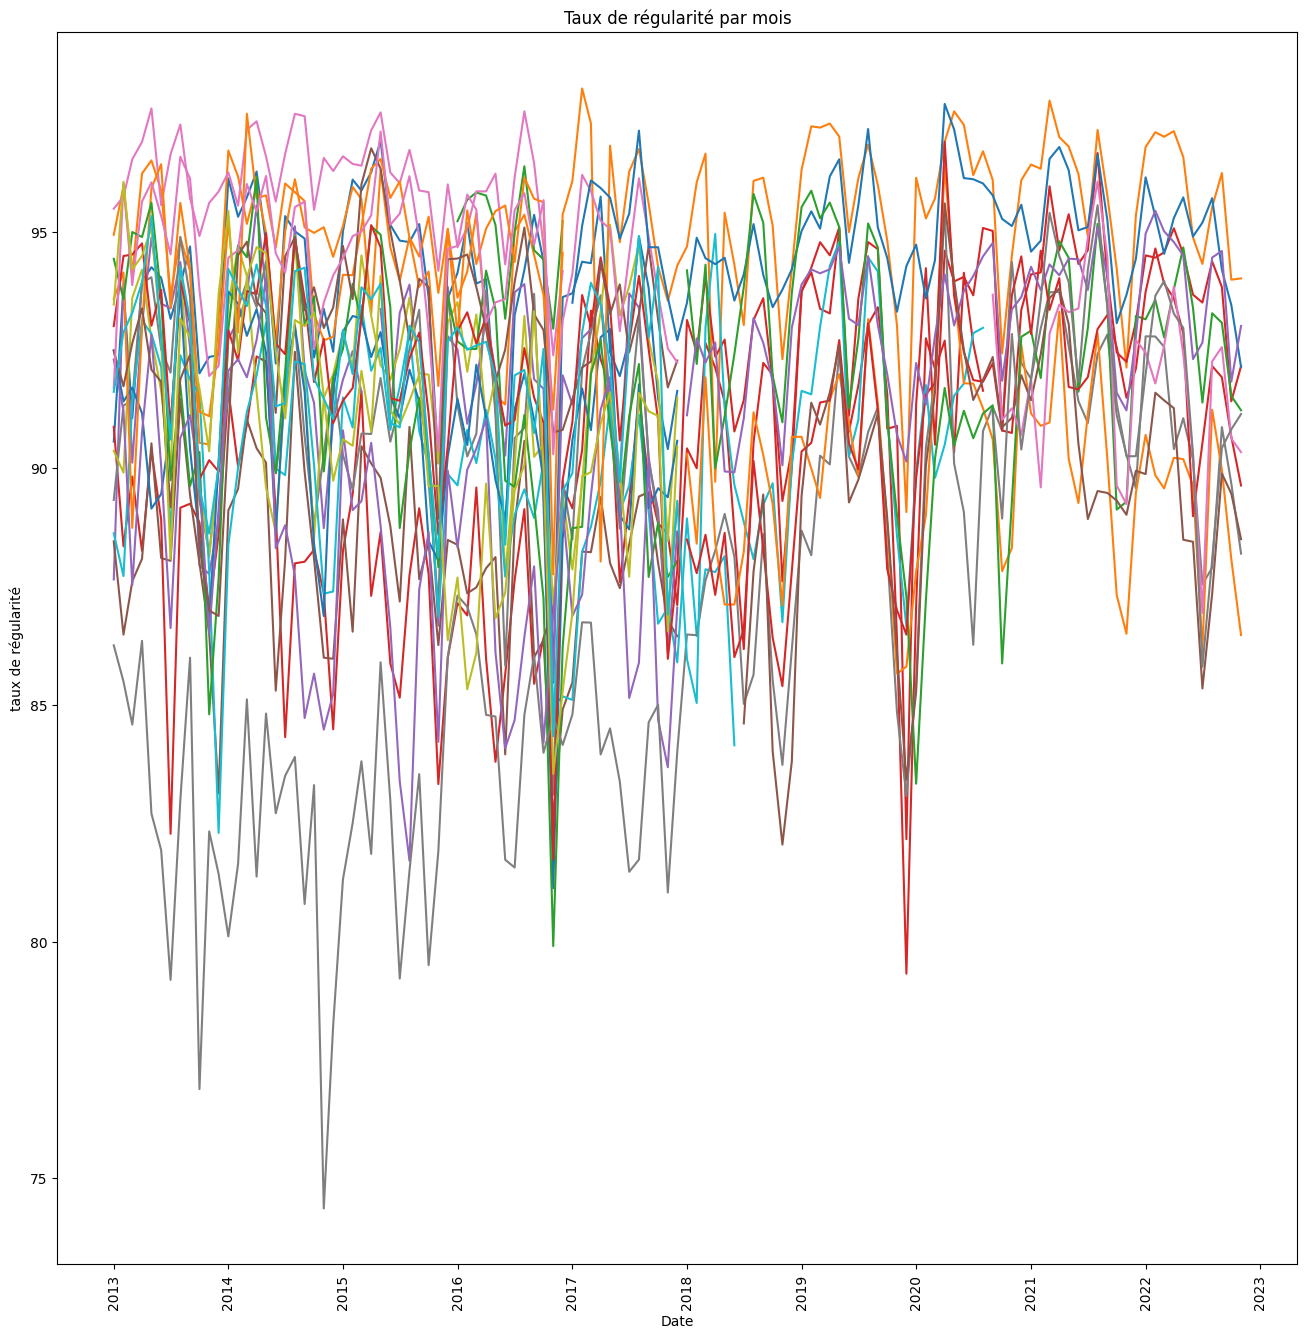

In [147]:
import matplotlib
from matplotlib import pyplot

for i in list_regions:
    df_region_i=df[df['region']==i]
    df_region_i=df_region_i.sort_values(by='date')


    matplotlib.pyplot.rcParams["figure.figsize"] = [16.0, 16.0]
    matplotlib.pyplot.title('Taux de régularité par mois')
    matplotlib.pyplot.xlabel('Date')
    matplotlib.pyplot.ylabel('taux de régularité')
    matplotlib.pyplot.xticks(rotation=90)
    matplotlib.pyplot.plot(df_region_i.date,df_region_i.taux_de_regularite)

2.Relation entre le nombre de trains prévus et le nombre de trains ayant effectivement circulé.

In [ ]:
test.plot.scatter(x="nombre_de_trains_programmes", y="nombre_de_trains_annules")
